# Sales Price Prediction

## Import the libraries and load the data

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score,mean_squared_error

In [2]:
path = r"../Datasets/Advertising.csv"

In [8]:
df = pd.read_csv(path,index_col=False)

In [9]:
print(df)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [10]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Understanding the data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [14]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
148,149,38.0,40.3,11.9,10.9
82,83,75.3,20.3,32.5,11.3
169,170,284.3,10.6,6.4,15.0
183,184,287.6,43.0,71.8,26.2
152,153,197.6,23.3,14.2,16.6


In [16]:
df.shape

(200, 5)

In [18]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Data Cleaning

In [20]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [21]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [22]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [24]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [25]:
numeric_cols

['TV', 'Radio', 'Newspaper', 'Sales']

In [26]:
categorical_cols

[]

In [27]:
for col in numeric_cols:
    series = df[col].dropna()
    print(f"\n\nColumn: {col}")
    print("  Count:", int(series.count()))
    print("  Mean:", series.mean())
    print("  Std:", series.std())
    print("  Min:", series.min())
    print("  25%:", series.quantile(0.25))
    print("  Median:", series.median())
    print("  75%:", series.quantile(0.75))
    print("  Max:", series.max())
    print("  Skewness:", series.skew())
    print("  Kurtosis:", series.kurtosis())



Column: TV
  Count: 200
  Mean: 147.0425
  Std: 85.85423631490808
  Min: 0.7
  25%: 74.375
  Median: 149.75
  75%: 218.825
  Max: 296.4
  Skewness: -0.06985336213274573
  Kurtosis: -1.2264948242299691


Column: Radio
  Count: 200
  Mean: 23.264000000000006
  Std: 14.846809176168724
  Min: 0.0
  25%: 9.975
  Median: 22.9
  75%: 36.525
  Max: 49.6
  Skewness: 0.09417463149664404
  Kurtosis: -1.2604014033120108


Column: Newspaper
  Count: 200
  Mean: 30.553999999999995
  Std: 21.778620838522826
  Min: 0.3
  25%: 12.75
  Median: 25.75
  75%: 45.1
  Max: 114.0
  Skewness: 0.8947204074986175
  Kurtosis: 0.6495019091381007


Column: Sales
  Count: 200
  Mean: 14.0225
  Std: 5.217456565710478
  Min: 1.6
  25%: 10.375
  Median: 12.9
  75%: 17.4
  Max: 27.0
  Skewness: 0.4075714250767127
  Kurtosis: -0.40886922014994376


In [30]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


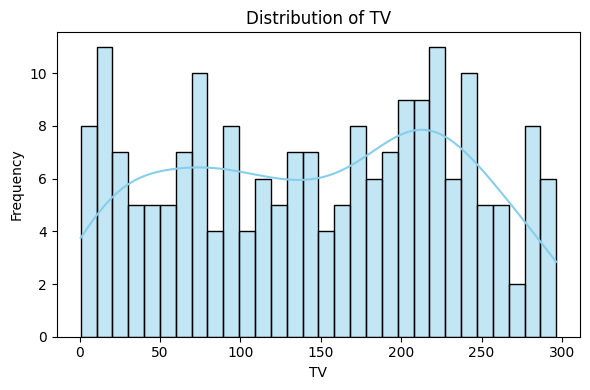

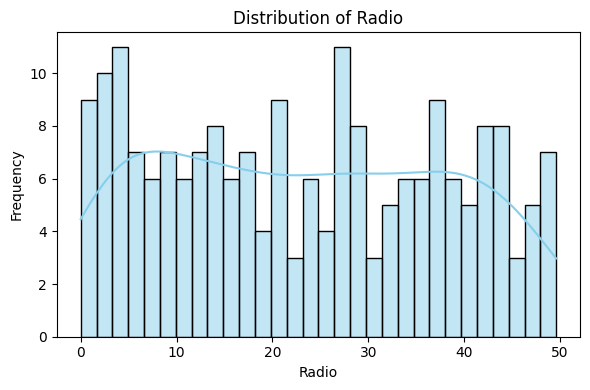

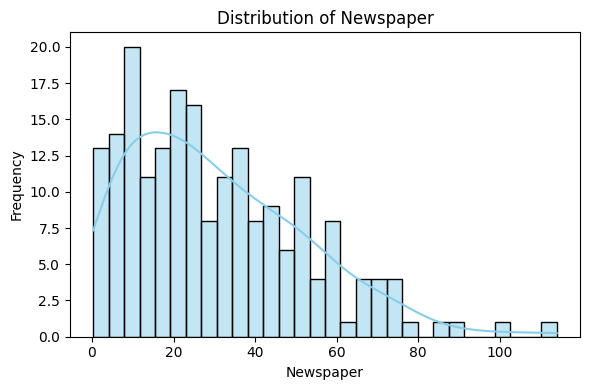

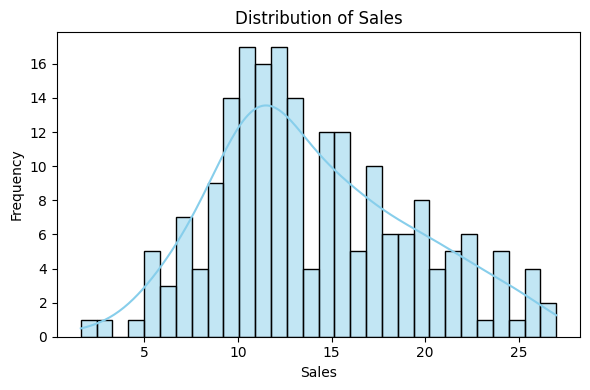

In [31]:
# Distribution plots
features = ['TV', 'Radio', 'Newspaper', 'Sales']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


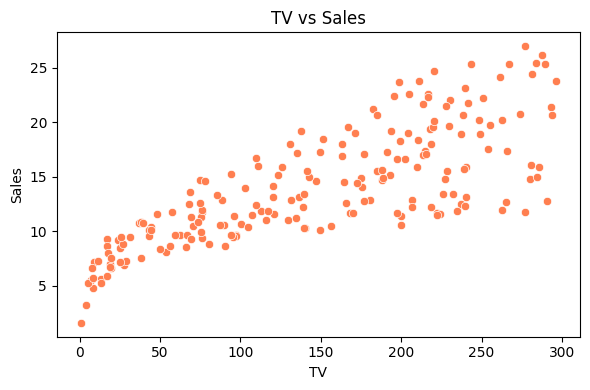

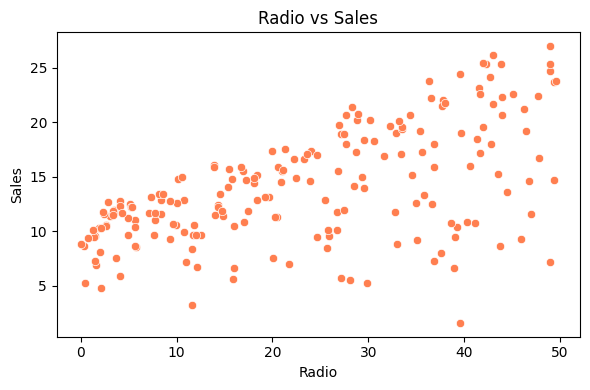

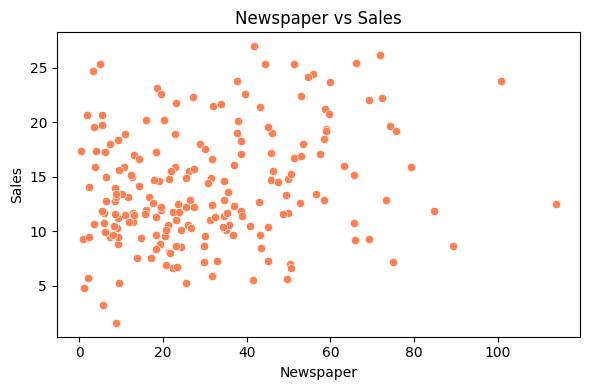

In [32]:
ad_channels = ['TV', 'Radio', 'Newspaper']
for col in ad_channels:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='Sales', color='coral')
    plt.title(f'{col} vs Sales')
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.tight_layout()
    plt.show()



In [33]:
# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


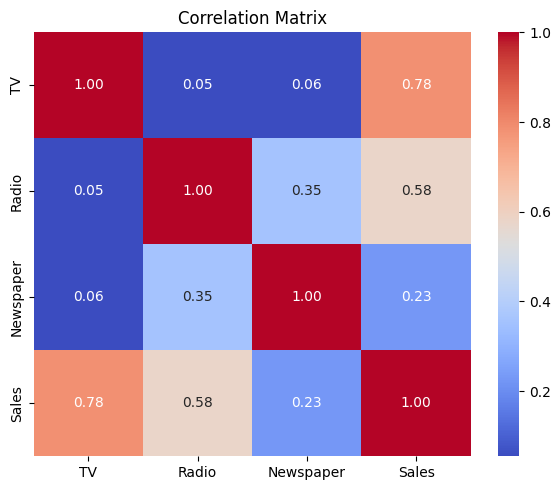

In [34]:
# Heatmap of correlations
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


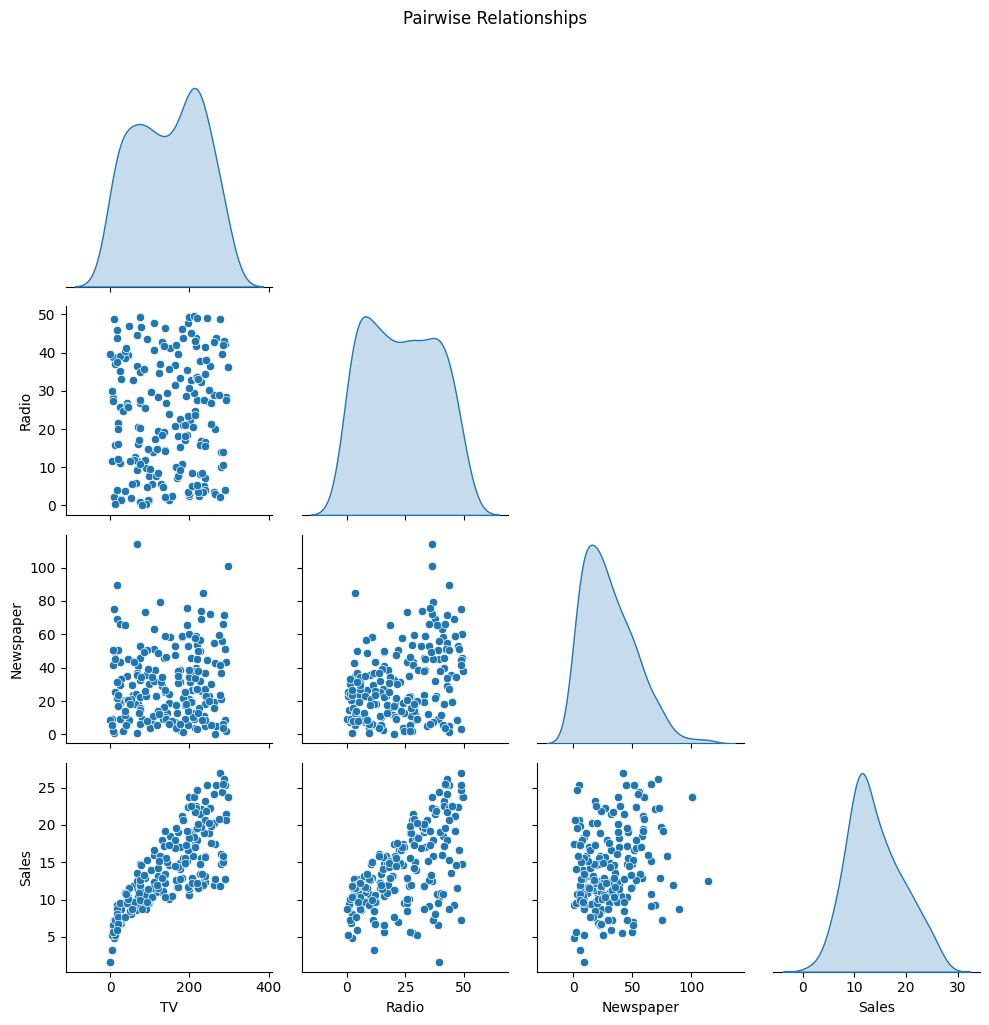

In [35]:
# Pairplot of all features
sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.tight_layout()
plt.show()



## Feature Engineering and Model Training with evaluation

In [48]:
# Features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                      # Feature scaling
    ('model', LinearRegression())                      # Regression model
])


In [51]:

# Fit pipeline
pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [52]:

# Predict
y_pred = pipeline.predict(X_test)


In [56]:
# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.8994380241009119
RMSE: 1.7815996615334508
